# **CURSO: MINERIA DE DATOS**
# **TAREA: Actividad 03 Reglas de Asociación**
---
**ESTUDIANTE:** ROSMEL URIEL DEZA CONDORI  
**CÓDIGO:** 171058 

---



##**1. BASE DE DATOS**

La base de datos a utilizar corresponde a múltiples playlists de la plataforma spotify
creadas por usuarios de esta. Este es una muestra del dataset publicado para el `Rec- Sys Challenge 2018`.

En específico, se entragará un solo `spotify.npy`:

##**2. IMPORTAR LAS LIBRERIAS**
*    `pandas`: Está librería se enfoca en el analisis de la estructura de datos, en este caso para contador de canciones.
*   `numpy`: La liberia numpy se utiliza para cargar spotify.npy.
*   `itertools`: Union de dos vectores que transforma un objeto
*   `networkx`: Generación de gráficos y facilidades para leer y escribir gráficos

In [1]:
import numpy as np
import pandas as pd
import itertools as iter
from itertools import chain
from itertools import groupby, combinations

## **3. OTRA FUNCIONES QUE AYUDARAN A NUESTRO ALGORITMO APRIORI**


In [2]:
# Contador de elementos, el numero de veces que se repite en la playlist
def contador_element(n_subconjuntos, playlists):
  if type(n_subconjuntos) is str:
    n_subconjuntos = [n_subconjuntos]
  # Si un elmento está en la transaccion
  def contador_instancia(seq):
    return set(n_subconjuntos).issubset(set(seq)) 
  return len(list(filter(contador_instancia, playlists))) 

In [3]:
def union_elemento(elemento, k):
  if type(elemento[0]) == str and k == 2:
    #Combinamos los 1_elementos
    lista_temporal_union=list(combinations(elemento, k))
    #Ordenamos la lista
    return sorted(lista_temporal_union) 
  # Combinamos n-elmentos
  else: 
    # Combinamos todos los n_elementos en grupos de 2
    lista_temporal = list(combinations(elemento, 2)) 
    # Pasamos los de la tamaño n
    lista_temporal2 =[]
    for i in lista_temporal:
      if len(set(iter.chain(*i))) == k and i[0][0] == i[1][0]:
        lista_temporal2.append(tuple(set(iter.chain(*i))))

    elementos = []
    for i in lista_temporal2:
      if i not in elementos:
        # Los elemenots no se repiten
        elementos.append(tuple(sorted(i))) 
    return elementos

In [4]:
def reglas(elemento):
  # Funcion para hallar el el complemento de un conjunto
  def complemento(elem,conjunto):
    return tuple(set(conjunto) - set(elem))
  if (len(elemento) == 2):
    # reglas cuando hay dos elementos
    return [(elemento[0], elemento[1]), (elemento[1], elemento[0])] 
  else:
    list_temporal = []
    for i in range(len(elemento)-1, 0,-1):
      # Pasamos la reglas no repetidas
      for elem in list(combinations(elemento, i)):
        if complemento(elem, elemento) not in list_temporal:
          list_temporal.append((elem, complemento(elem, elemento)))
    return list_temporal

##**4. FUNCIONES IMPORTANTES A UTILIZAR**

**1. FUNCION:** `get_frequent_itemsets(playlists, min_support):`

Recibe la esctructura de datos que contiene a las playlists y retorna una estructura con los itemsets fre-
cuentes, bajo un umbral mínimo de confianza.

In [5]:
def get_frequent_itemsets(playlists, min_support):

  #tolist() función que sirve para convertir un array en una lista
  #dict_playlist_spotify=dataset_spotify.tolist()

  #Para obtener una lista de valores
  #playlists=list(dict_playlist_spotify.values())

  # Procedemos a eliminar las canciones que se "repiten" en los playlist
  playlists = [list(set(i)) for i in playlists]

  #Convertimos a una sola lista todas la canciones de los 10000 playlist
  all_playlist_onelist = list(iter.chain(*playlists))

  #Primero vamor ordenar la lista
  lista_ordenada=sorted(all_playlist_onelist)

  # Vamos a identificar los 1-elementos mas frecuentes y obtenemos el numero de instancias
  un_ElementoSoporte=[]
  for elemento,lista in groupby(lista_ordenada):
    soporte=len(list(lista))/len(playlists)
    elementoSoporte=(elemento,soporte)
    un_ElementoSoporte.append(elementoSoporte)

  # Vamos a filtrar los elementos que son >= que min_support
  frecuencia_unElemento=[]
  for elemento,soporte in un_ElementoSoporte:
    if soporte>=min_support:
      elementS=(elemento,soporte)
      frecuencia_unElemento.append(elementS) 

  # convertir a dataframe (por la gran cantidad de datos)
  dataF_playlists_frecuente = pd.DataFrame(frecuencia_unElemento)
  dataF_playlists_frecuente = dataF_playlists_frecuente.rename(columns = {0:'Elemento_frecuente', 1:'Support'})
  print('Element_1: ', len(un_ElementoSoporte))
  print("Nro_element:",len(dataF_playlists_frecuente),'\n' )

  # Buscamos los 2_items frecuentes hasta n_items frecuentes hasta que no haya más
  i = 2
  # Nuestro dataframe final 
  dataFinal_lista = [] 
  dataF_set_frecuente = dataF_playlists_frecuente
  # El elemento 1 ya hallamos por lo tanto empezamos del elemento 2
  while len(dataF_set_frecuente) > 1:
    # Unimos el elementos (n-1) para hallar el elemento (n)
    n_elementos = union_elemento(list(dataF_set_frecuente['Elemento_frecuente']), i)
    print('Element_'+str(i)+': ', len(n_elementos))
    #Creamos un dataframe para guardar nuestro elemento frecuente, count_support,support en cada iteracion
    dataF_n_elementos = pd.DataFrame()
    #En la columna Elemento frecuente agregamos los elementos que unimos
    dataF_n_elementos['Elemento_frecuente'] = n_elementos
    #En la columna count support agregamos el numero de veces de los n_elementos en la transaccion
    dataF_n_elementos['Count_support'] = dataF_n_elementos['Elemento_frecuente'].apply(contador_element, playlists = playlists)
    #En la columna support agregamos el soporte de cada elementos
    dataF_n_elementos['Support'] = dataF_n_elementos['Count_support']/len(playlists)
    # Vamos a filtrar los elementos que son >= que min_support
    dataF_set_frecuente = dataF_n_elementos[dataF_n_elementos['Support'] >= min_support] 
    print("Nro_element:",len(dataF_set_frecuente),'\n')
    #Se aumenta en 1 oara encontrar los n_elementos
    i += 1
    # Adjuntamos nuestro dataF_set_frecuentes a la lista dataFinal_lista
    dataFinal_lista.append(dataF_set_frecuente) 
    #print(dataFinal_lista)
  return pd.concat([dataFinal_lista[i] for i in range(len(dataFinal_lista))])

**2. FUNCION:** `generate_association_rule (frequent_itemsets, confidence = 0, lift = 0):`

Recibe los itemsets frecuentes generados por la función anterior y nos devuelve las reglas de asociación.

Argumentos✅
`confidence = 0.5 y lift = 1.2`

In [6]:
# A la funcion le entregamos un dataframe de n_elementos mas frecuentes
# y tammbien confidence=0.5, lift=1.2
def generate_association_rules(frequent_itemsets,confidence = 0, lift = 0):
  # Buscamos todas las reglas en funcion al conjunto frecuente
  lista_reglas = []
  for i, row in frequent_itemsets.iterrows():
    dFrame_temporal = pd.DataFrame()
    regla_temporal = reglas(row['Elemento_frecuente'])
    dFrame_temporal['Izquierda'] = [i[0] for i in regla_temporal]
    dFrame_temporal['Derecha'] = [i[1] for i in regla_temporal]
    dFrame_temporal['Count_support'] = [row['Count_support']] * len(regla_temporal)
    lista_reglas.append(dFrame_temporal)
  
  concat_list=[]
  for i in lista_reglas:
    concat_list.append(i)
  #Concatenamos los dataFrames
  dFrame_reglas = pd.concat(concat_list)

  # Hallamos los indicen de confianza y lift
  dFrame_reglas['countderecha'] = dFrame_reglas['Derecha'].apply(contador_element, playlists = playlist)
  dFrame_reglas['Reglas de asociacion'] = dFrame_reglas['Izquierda'].astype(str)+ "<---->" + dFrame_reglas['Derecha'].astype(str)
  dFrame_reglas['Support'] = dFrame_reglas['Count_support']/len(playlist)
  dFrame_reglas['Confidence'] = dFrame_reglas['Count_support']/dFrame_reglas['countderecha']
  dFrame_reglas['supportderecha'] = dFrame_reglas['countderecha'] / len(playlist)
  dFrame_reglas['Lift'] = dFrame_reglas['Confidence'] / dFrame_reglas['supportderecha']

  # Mostramos las reglas que cumplan con confidence=0.5, lift=1.2
  dFrame_reglas = dFrame_reglas[dFrame_reglas['Confidence'] >= confidence]
  dFrame_reglas_final = dFrame_reglas[dFrame_reglas['Lift'] >= lift]
  return dFrame_reglas_final.drop(['Izquierda','Derecha','Count_support', 'countderecha', 'supportderecha'], axis=1)

##**5. CARGAR EL DATASET  `spotify.npy`**

Para cargar el dataset `spotify.npy` hacemos el uso de de la funcion `load`

In [7]:
dataset_spotify=np.load("spotify.npy",allow_pickle=True)

##**6. APLICAR EL ALGORITMO Y OBTENER REGLAS DE ASOCIACIÓN**

Nuestro `dataset_spotify` convertinos en un multilistas

In [8]:
#tolist() función que sirve para convertir un array en una lista
dict_playlist_spotify=dataset_spotify.tolist()
#Para obtener una lista de valores
playlist=list(dict_playlist_spotify.values())

Mostramos el numero total de playlist

In [9]:
print("El numero de playlist en el dataset spotify.npy:",len(playlist))

El numero de playlist en el dataset spotify.npy: 10000


Una pequeña muestra de 12 playlist de un total de 10000 playlist de nuestro dataset `spotify.npy`

In [10]:
for i in range(12):
  print("Playlist "+str(i+1)+": "+str(playlist[i]))

Playlist 1: ['Lose Control (feat. Ciara & Fat Man Scoop)', 'Toxic', 'Crazy In Love', 'Rock Your Body', "It Wasn't Me", 'Yeah!', 'My Boo', 'Buttons', 'Say My Name', 'Hey Ya! - Radio Mix / Club Mix', 'Promiscuous', 'Right Where You Want Me - Radio Edit Version', 'Beautiful Soul', "Leavin'", 'Me & U', 'Ice Box', 'Sk8er Boi', 'Run It!', 'Check On It - feat. Bun B and Slim Thug', "Jumpin', Jumpin'", 'Soak Up The Sun', 'Where Is The Love?', "Stacy's Mom", 'Just The Girl', 'Yo (Excuse Me Miss)', 'Year 3000', 'Lip Gloss', 'Everytime We Touch - Radio Edit', 'Whatcha Say', 'Miss Independent', 'Party In The U.S.A.', 'The Great Escape', 'Replay', 'Forever', 'Your Love Is My Drug', 'Closer', 'One Less Lonely Girl', 'Paper Planes', 'Mr. Brightside', 'All The Small Things', 'Beep', 'Somebody To Love', 'Dirty Little Secret', 'Baby', 'A Thousand Miles', 'Livin on Sunday', 'See You Again', 'How Do You Sleep? - Featuring Ludacris', 'This Is Me', 'My Happy Ending', 'Check Yes Juliet', 'The Great Escape']


###**PARA OBTENER N_ITEMS FRECUENTES**

**1. FUNCION:** `get_frequent_itemsets(playlists, min_support):`


*   `playlist` = `list_playlist_spotify`
*   `min_suport` = `0.0162`



Utilzando la función `get_frequent_itemsets` obtenemos nuestro n_items frecuentes

In [11]:
#min_support=0.0162
min_support=0.0162

In [13]:
frequent_set_item=get_frequent_itemsets(playlist, min_support)

Element_1:  132920
Nro_element: 279 

Element_2:  38781
Nro_element: 12 

Element_3:  10
Nro_element: 0 



In [14]:
frequent_set_item

,Elemento_frecuente,Count_support,Support
5640,"(Bad and Boujee (feat. Lil Uzi Vert), Bounce B...",169,0.0169
5700,"(Bad and Boujee (feat. Lil Uzi Vert), HUMBLE.)",167,0.0167
9386,"(Broccoli (feat. Lil Yachty), Caroline)",172,0.0172
13843,"(Congratulations, HUMBLE.)",214,0.0214
13893,"(Congratulations, Mask Off)",162,0.0162
14014,"(Congratulations, XO TOUR Llif3)",179,0.0179
14023,"(Congratulations, iSpy (feat. Lil Yachty))",162,0.0162
15160,"(DNA., HUMBLE.)",190,0.0190
21810,"(HUMBLE., Mask Off)",204,0.0204
21931,"(HUMBLE., XO TOUR Llif3)",204,0.0204


### **PARA OBTENER REGLAS DE ASOCIACIÓN**

**2. FUNCION:** `generate_association_rule (frequent_itemsets, confidence = 0, lift = 0):`

*   `frequent_itemsets = frequent_item`
*   `confidence = 0.5`
*   `lift = 1.2`




Obtenemos las reglas de asociacion

In [15]:
reglas_association = generate_association_rules(frequent_set_item, confidence=0.5, lift=1.2)

In [16]:
reglas_association

,Reglas de asociacion,Support,Confidence,Lift
0,Bad and Boujee (feat. Lil Uzi Vert)<---->Bounc...,0.0169,0.569024,19.159043
1,HUMBLE.<---->Congratulations,0.0214,0.531017,13.176610
0,Congratulations<---->Mask Off,0.0162,0.512658,16.223362
0,Congratulations<---->XO TOUR Llif3,0.0179,0.554180,17.157262
1,HUMBLE.<---->DNA.,0.0190,0.822511,35.606529
0,HUMBLE.<---->Mask Off,0.0204,0.645570,20.429418
0,HUMBLE.<---->XO TOUR Llif3,0.0204,0.631579,19.553528
0,HUMBLE.<---->goosebumps,0.0167,0.542208,17.604149
0,Mask Off<---->XO TOUR Llif3,0.0163,0.504644,15.623652
1,XO TOUR Llif3<---->Mask Off,0.0163,0.515823,16.323506


###**MEJORES 10 REGLAS DE ASOCIACIÓN**

Nuestras mejores 10 reglas de asociacion

In [17]:
reglas_association = reglas_association.sort_values(by=['Confidence','Lift','Support'],ascending = False).reset_index(drop = True)
reglas_association

,Reglas de asociacion,Support,Confidence,Lift
0,HUMBLE.<---->DNA.,0.0190,0.822511,35.606529
1,HUMBLE.<---->Mask Off,0.0204,0.645570,20.429418
2,HUMBLE.<---->XO TOUR Llif3,0.0204,0.631579,19.553528
3,Bad and Boujee (feat. Lil Uzi Vert)<---->Bounc...,0.0169,0.569024,19.159043
4,Congratulations<---->XO TOUR Llif3,0.0179,0.554180,17.157262
5,HUMBLE.<---->goosebumps,0.0167,0.542208,17.604149
6,HUMBLE.<---->Congratulations,0.0214,0.531017,13.176610
7,XO TOUR Llif3<---->Mask Off,0.0163,0.515823,16.323506
8,Congratulations<---->Mask Off,0.0162,0.512658,16.223362
9,Mask Off<---->XO TOUR Llif3,0.0163,0.504644,15.623652


##**7. EXPLICAR LAS REGLAS OBTENIDAS**

###**LAS 4 REGLAS DE ASOCIACION**

In [18]:
#Nuestras 4 mejores reglas de asociacion
reglas_association[0:4]

,Reglas de asociacion,Support,Confidence,Lift
0,HUMBLE.<---->DNA.,0.0190,0.822511,35.606529
1,HUMBLE.<---->Mask Off,0.0204,0.645570,20.429418
2,HUMBLE.<---->XO TOUR Llif3,0.0204,0.631579,19.553528
3,Bad and Boujee (feat. Lil Uzi Vert)<---->Bounc...,0.0169,0.569024,19.159043


###**REGLA: 1**

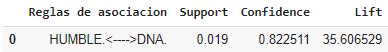

Esta primera regla tiene alto soporte, alta confianza, si investigamos estas dos canciones tienen mismos compositores, tambien el artista que canta es Kendrik Lamara para ambas canciones.

*   Los dos pertencen al mismo album llamado: **DMAN**
*   Los compositores para **HUMBLE** son: Asheton Hogan / K. Duckworth / M. Williams Ii
*   Los compositores para **DNA** son: K. Duckworth / M. Williams Ii


En conclusion tenemos un aproximado el 80% de confianza




###**REGLA: 2**

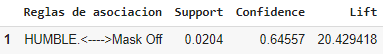

La segunda regla es `HUMBLE.<---->Mask Off` tiene un lift de 20:429418.

>  Artista 
*   El artista de **HUMBLE** es: Kendrick Lamar
*   El artista de **Mask Off** es: Future

>   Genero
* El genero de **HUMBLE** es: Hip-hop/rap
* El genero de **Mask Off** es: Hip-hop/rap

La justificacion para esta regla de asociacion para estas dos canciones es que ambos artistas hacen remix, tambien comparten el mismo genero.

Para esta regla tenemos 64% de confianza




###**REGLA: 3**

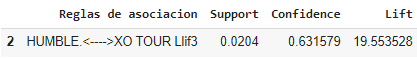

La tercera regla con confianza de 63% es: `HUMBLE.<---->XO TOUR Llif3`	


> Artista: 
* El artista de HUMBLE es: Kendrick Lamar
* El artista de XO TOUR Llif3 es: Lil Uzi Vert

> Genero:
* El genero de **HUMBLE** es: Hip-hop/rap
* El genero de **XO TOUR Llif3** es: Hip-hop/rap y Emo rap

> Album▶
*   Para la musica **HUMBLE** es: DAMN
*   Para la musica **XO TOUR Llif3** es: Luv Is Rage 2

La justificacion para esta regla de asociacion es ambos pertenecen al mismo genero, ademas que estan en los top 10 que se transmitieron en el año 2017.



###**REGLA: 4**

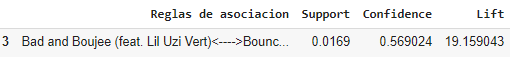

La cuarta regla regla con confianza de 57% es: `Bad and Boujee (feat. Lil Uzi Vert)<---->Bounc...	`	


> Artista: 
* El artista de Bad and Boujee (feat. Lil Uzi Vert) es: Migos
* El artista de Bounce back es: Big Sean

> Genero:
* El genero de **Bad and Boujee (feat. Lil Uzi Vert)** es: Hip-hop/rap
* El genero de **Bounce back** es: Hip-hop/rap

> Album▶
*   Para la musica **Bad and Boujee (feat. Lil Uzi Vert)** es: Culture
*   Para la musica **Bounce back** es: I decided

La justificacion para esta regla de asociacion es ambos canciones pertenecen al mismo genero, William Singe que es un compositor integró y reutilizó  para crear una nueva cancion.

**Migos - Bad And Boujee X Big Sean - Bounce Back (William Singe Cover/Remix):**
https://soundcloud.com/vibezmusic-fc/migos-bad-and-boujee-x-big-sean-bounce-back-william-singe-coverremix

Es la justificacion del 57% de confianza.